# De la clase anterior

Cost function

Encontramos en la clase anterior
\begin{eqnarray}
  J(\Theta)= -\frac{1}{m} 
  \sum_{i=1}^m \sum_{k=1}^{K} y_i^{(k)} \log [h_k(\Theta, x^{(i)})] + (1-y_i^{(k)}) 
  \log [ 1 - h_k(\Theta,x^{(i)})] + 
  \frac{\lambda}{2m} \sum_{l=1}^L \sum_{i=1}^{n_l}
  \sum_{j=1}^{n_{l+1}} (\Theta_{ij}^{(l)})^2. \nonumber 
\end{eqnarray}

Ahora, en clase vimos que


\begin{eqnarray*}
  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} =
  (1 - A_{ij}^{(L+1)}) \left (  
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)}
  \Theta_{qj}^{(L)} \right )  \;.
\end{eqnarray*}

y

\begin{eqnarray*}
  \frac{\partial (\log ( 1- h_{ij} (\Theta, X) ))}{\partial \Theta_{pq}^{(L-1)}} &=& - A_{ij}^{(L+1)}  
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)} 
  \right ) \,.
\end{eqnarray*}

Combinando estas dos expressiones encontramos que:
\begin{eqnarray*}
  && y_{ij}  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} 
  + (1-y_{ij}) 
  \frac{\partial \log [1-h_{ij} (\Theta, X) )]}{\partial \Theta_{pq}^{(L-1)}} =  \\
  && \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}  \right )
  [ y_{ij} (1- A_{ij}^{(L+1)})  - (1-y_{ij}) A_{ij}^{L+1}) ] \\
  &=& 
  (y_{ij} - A_{ij}^{(L+1)}) 
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}   \right )\,.
\end{eqnarray*}







\begin{eqnarray*}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(L-1)}_{pq} } &=& 
  \frac{1}{m} \sum_i \sum_j 
  (A_{ij}^{(L+1)} - y_{ij})
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}  \right ) \\
  &=& \frac1m \sum_i \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
   \right ) \sum_j (A_{ij}^{(L+1)} - y_{ij}) \Theta_{qj}^{(L)}  \\
  &=&\frac1m \sum_i \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
   \right ) [ A^{(L+1)} - Y ) ( \Theta^{(L)})^T]_{iq} \\
   &=& \frac1m \sum_i A_{ip}^{(L-1)} [ A^{(L+1)} - Y ) ( \Theta^{(L)})^T]_{iq}\ A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) \\
   &=& \frac1m \sum_iA_{ip}^{(L-1)} [ A^{(L+1)} - Y ) ( \Theta^{(L)})^T]_{iq} [ A^{(L)} .* (1 - A^{(l)})]_{iq}  \\
   &=& \frac1m [(A^{(L-1)})^T]_p [ A^{(L)} .* (1 - A^{(l)})]_{q}
\end{eqnarray*}

## Diganosticos de ML



1.   Entrenamiento
2.   Validacion (cross-validation)
3.   Prueba (Testing)

### Ejemplo:
Asumamos seis hipotesis para resolver un problema (de regresion polinomica)
\begin{eqnarray}
h_1(\theta, x) &=& \theta_0 + \theta_1 x \\
h_2(\theta, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2 \\
&\vdots& \\
h_6(\theta, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_6 x^6
\end{eqnarray}

Sobre estas hipotesis vamos a calcular los costos
\begin{eqnarray}
J_{\text{train}} &=& \frac{1}{2 m_{\text{train}}} \left [ \sum_{i=1}^{m_{\text{train}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{m_{\text{train}}} \theta_i^2
  \right ] \\
  J_{\text{cv}} &=& \frac{1}{2 m_{\text{cv}}} \left [ \sum_{i=1}^{m_{\text{cv}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{m_{\text{cv}}} \theta_i^2
  \right ] \\
  J_{\text{test}} &=& \frac{1}{2 m_{\text{test}}} \left [ \sum_{i=1}^{m_{\text{test}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{m_{\text{test}}} \theta_i^2
  \right ] \\
\end{eqnarray}



Hay otro metodo importante que se llama el k-fold cross validation.


Se separan los datos en dos grupos. Uno entrenamiento y el otro de prueba.
De los datos de prueba los divimos en $k$ grupos. Se toman $k-1$ grupos para
entrenar (cross-validar) y $k$ para probar, y se rotan. $2, \cdots k$, $1, 3, \cdots k$, $1, 2, \cdots k$. 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# cargamos los datos de https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
X.shape

(70000, 784)

In [ ]:
784**(0.5)

28.0

In [ ]:
W = X.reshape(70000,28,28,1)

8:30 **pm**

# Bias Versus Variance
las componentes de error en un modelo son:


1.   Bias (sesgo): Es en general que tan lejos (en promedio) esta la solucion de la correcta
2.   Varianza: Es el error causado cuando los datos se ajustan muy precisos al modelo. Muchas veces siguiendo el ruido.
3.    Ruido (noise)

Esto lo vamos a cuantificar. Con la funcion objetivo

$$ J(\theta) = \frac{1}{2m} \left [ \sum_{i=1}^m ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^m \theta_i^2
  \right ] $$

  Excepto por el factor $1/2$ (conveniencia) el primer termino (la primera suma)
  es el MSE (Mean Squared Error)

El modelo que seguimos es 
$$y = f(x) + \epsilon $$
Matematizamos los conceptos bias, variance, noise:
MSE: Asumamos que los datos tienen una distribucion estadisca con probabilidad $p(x)$. El MSE:
$$ \text{E}[ (y - h(x))^2 ]= \sum_{i=1}^m (y_i - h(x_i))^2 p(x_i)$$
Si $p$ fuera uniforme , $p=1/m$.

Asumamos el error con varianza 0 $\sigma=0$.
\begin{eqnarray}
\text{Bias}[ h(x) ] &=& \text{E}[ h(x) ] - E[f(x)] = \text{E}[h(x)] - y \\
\text{Var}[h(x)] &=& \text{E}[h^2(x)] - \text{E}^2[h(x)]
\end{eqnarray}
El objeto es ver que el MSE es una suma de la varianza con el sesgo .






Veamos la prueba
\begin{eqnarray}
 \text{E}[ (y - h(x))^2 ] &=& \text{E}[ y^2 - 2 y h(x) + h^2(x)] = y^2 - 2 y E[h(x)] + E[h^2(x)] \\
 \text{Bias}^2 [ h(x)] &=& \text{E}^2[ h(x) ] - 2 y E[h(x)] + y^2 \\
 \text{Var}[h(x)] &=& \text{E}[h^2(x)] - E^2 [ h(x) ] + 
\end{eqnarray}

$$ \text{E}[ (y - h(x))^2 ] = y^2 - 2 y E[h(x)]  + \text{E}^2[ h(x) ] + E[h^2(x)] - \text{E}^2[ h(x) ] = \text{Bias}^2[h(x)] + \text{Var}[h(x)]$$

Es decir, que el MSE es igual a el bias (al cuadrado) mas la varianza

Veamos el "bullseye"

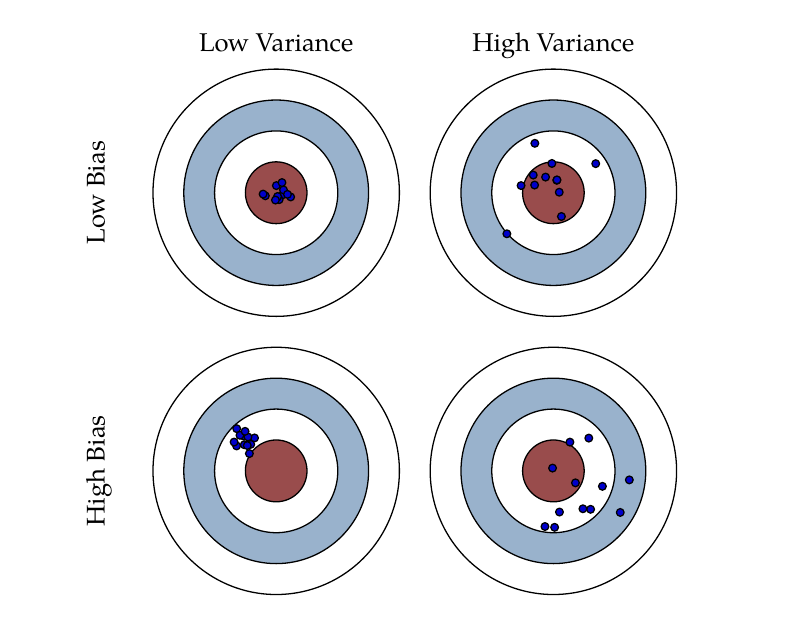

Bullseye.

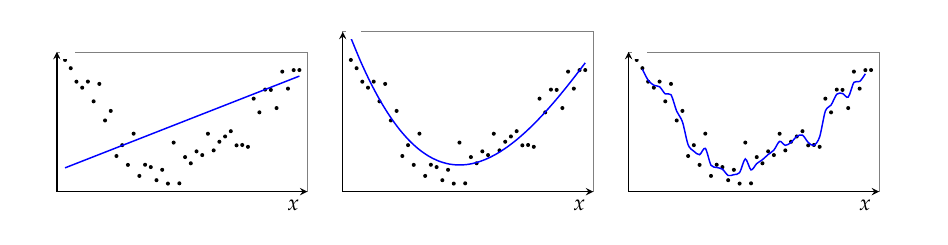

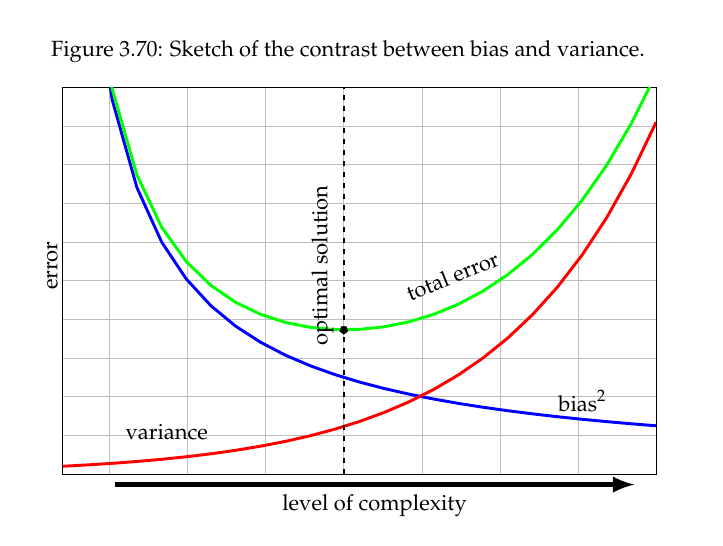

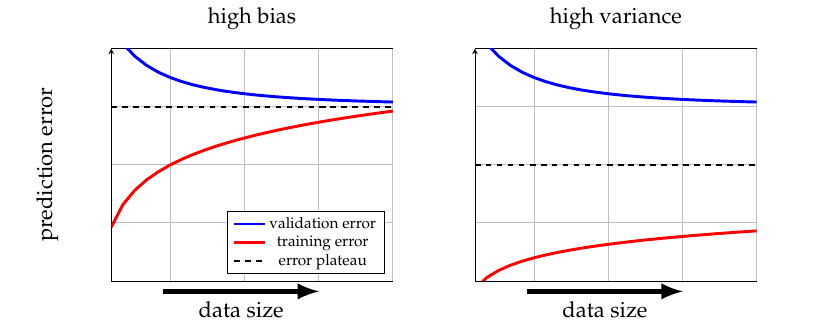

# Ideas para reducir el "bias" y la varianza (son enemigos: underfitting/overfitting). 


Para reducir la varianza

1.   Incrementar el numero de muestras $m$. Mas datos
2.   Reducir el numero de "features" (el grado del polinomio). Para ANN . Reducir el numero de capas de la red
3.   Aumentar el parametro de regularizacion $\lambda$.

Para reducir el sesgo:


*   Incrementar el numero de "features". El grado del polinomio, por ejemplo
*   Reducir $\lambda$. 





# SVM: Support Vector Machines: Maquinas de Soporte Vectorial

En Regresion lineal queremos minimizar
$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m [ y_i - (a x_i + b)]^2 $$

En SVM queremos maximizar:
$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i, y_i), L(  $$

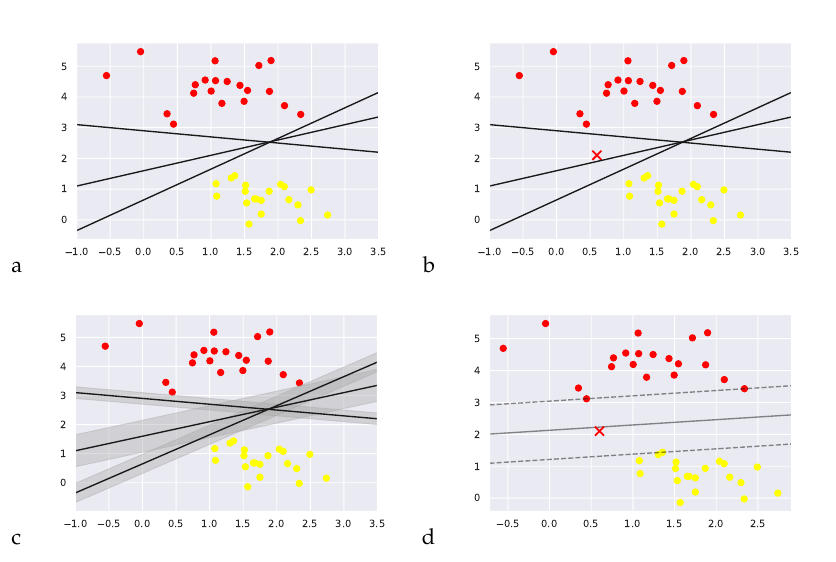

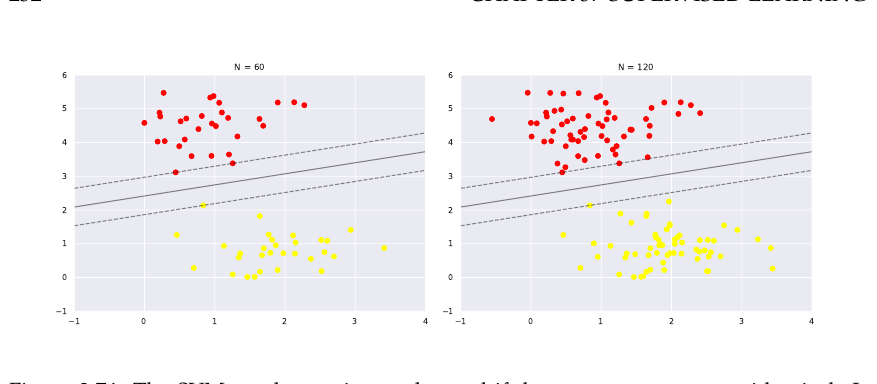

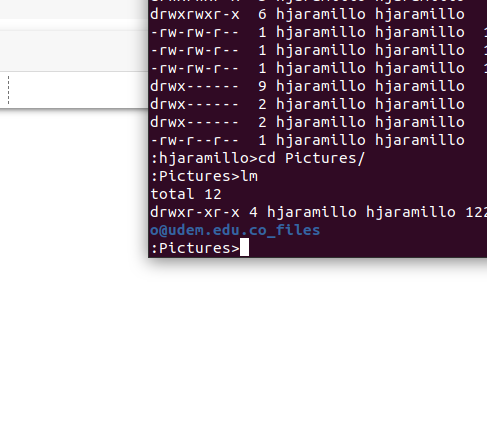

$$ f(x) = \int_a^b g(x,y) dy ................................................................................... $$

# Captitulo 1
sdfsdfsdfd
## Seccion 1
sdfsdfsdfsd
### section 2
* item 1
* item 2
* item 3


# New Section